In [1]:
from src.recommender import *

In [2]:
print(f'My shape is {df_mine.shape}', '\n')
print(f'Rolling shape is {df_rolling.shape}', '\n')
print(f'Mega_Mains shape is {df_mega_main.shape}', '\n')

My shape is (1109, 620) 

Rolling shape is (1363, 620) 

Mega_Mains shape is (12636, 620) 



In [44]:
new_df = df_mine[df_mine.columns[:23] | df_mine.columns[-4:]]
new_df.shape

/home/luke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



(1109, 27)

In [4]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled = scaler.transform(new_df)
scaled

array([[-0.76610814, -0.25977275, -1.19655953, ...,  0.46479845,
        -0.61008574,  0.86952639],
       [-0.83231984, -0.25977275, -0.87057019, ...,  0.46479845,
        -1.38146313,  0.86952639],
       [-0.82622184, -0.25977275, -0.59357943, ...,  0.46479845,
        -0.50174621,  0.86952639],
       ...,
       [-0.201883  , -0.08469649, -0.7848902 , ..., -0.8260066 ,
        -0.06405455,  0.56373766],
       [ 1.24822833, -0.08469649, -1.09057202, ..., -0.8260066 ,
        -1.19078557,  0.56373766],
       [ 2.60417659, -0.08469649,  2.40875128, ..., -0.8260066 ,
        -0.66642229,  0.56373766]])

# Clustering My Vinyls

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import seaborn as sns

In [6]:
kmeans = KMeans(n_clusters=20).fit(scaled)
kmeans.inertia_

16049.18294757666

In [7]:
new_df['cluster'] = kmeans.labels_
new_df

/home/luke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


acousticness  \
album                       name                                               artist          release_date album_image_url                                    artist_image_url                                   id                                     
The Saga Continues          Wu-Tang The Saga Continues Intro (feat. RZA)       Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 2EsC5nxXhoMrOsYbt59VUM      0.018200   
                            Lesson Learn'd (feat. Inspectah Deck and Redman)   Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 2RQ47bAanXMoCKIIUn5Kxn      0.000621   
                            Fast and Furious (feat. Hue Hef and Raekwon)       Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 2B6lQV5InRy13vd7wl26jg      0.002240   
                            Famous Fighters (Skit)                             Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 09zHR2ttyr84ibzpBVrmNu      0.065600   
                            If Time Is Money (Fly Navigation) [feat. Method... Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 5l3C7CgpiOoGF6B8qzbOR3      0.051300   
...                                                                                                                                                                                                                                                ...   
Modern Vampires of the City Finger Back                                        Vampire Weekend 2013-05-13   https://i.scdn.co/image/ab67616d0000b27363fcc0d... https://i.scdn.co/image/5390ca6bd240b2a15b71868... 5GwSD4gZHdZBYa23zwqBia      0.270000   
                            Worship You                                        Vampire Weekend 2013-05-13   https://i.scdn.co/image/ab67616d0000b27363fcc0d... https://i.scdn.co/image/5390ca6bd240b2a15b71868... 38BtUFtq4oxdB0Sku1iInh      0.001360   
                            Ya Hey                                             Vampire Weekend 2013-05-13   https://i.scdn.co/image/ab67616d0000b27363fcc0d... https://i.scdn.co/image/5390ca6bd240b2a15b71868... 1AmsqMwCRHj7BCtsZr7ZeY      0.168000   
                            Hudson                                             Vampire Weekend 2013-05-13   https://i.scdn.co/image/ab67616d0000b27363fcc0d... https://i.scdn.co/image/5390ca6bd240b2a15b71868... 2qkeodJXQPyrnPLXvUb9MJ      0.553000   
                            Young Lion                                         Vampire Weekend 2013-05-13   https://i.scdn.co/image/ab67616d0000b27363fcc0d... https://i.scdn.co/image/5390ca6bd240b2a15b71868... 1ZcI6ZPRjKhuF2fhxTCRGD      0.913000   

                                                                                                                                                                                                                                          artist_popularity  \
album                       name                                               artist          release_date album_image_url                                    artist_image_url                                   id                                          
The Saga Continues          Wu-Tang The Saga Continues Intro (feat. RZA)       Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 2EsC5nxXhoMrOsYbt59VUM                 71   
                            Lesson Learn'd (feat. Inspectah Deck and Redman)   Wu-Tang Clan    2017-10-13   https://i.scdn.co/image/ab67616d0000b2730801dc9... https://i.scdn.co/image/c4014e4323f08d1a32d63c6... 2RQ47bAa

# PCA Visuals

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.inspection import permutation_importance

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

In [9]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled = scaler.transform(new_df)
scaled

array([[-0.76610814, -0.25977275, -1.19655953, ..., -0.61008574,
         0.86952639,  1.54352381],
       [-0.83231984, -0.25977275, -0.87057019, ..., -1.38146313,
         0.86952639, -1.11790425],
       [-0.82622184, -0.25977275, -0.59357943, ..., -0.50174621,
         0.86952639, -0.49168588],
       ...,
       [-0.201883  , -0.08469649, -0.7848902 , ..., -0.06405455,
         0.56373766,  0.44764167],
       [ 1.24822833, -0.08469649, -1.09057202, ..., -1.19078557,
         0.56373766,  0.44764167],
       [ 2.60417659, -0.08469649,  2.40875128, ..., -0.66642229,
         0.56373766, -0.64824047]])

In [10]:
X_train, X_test = train_test_split(scaled, test_size=0.20, random_state=42)

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

/home/luke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


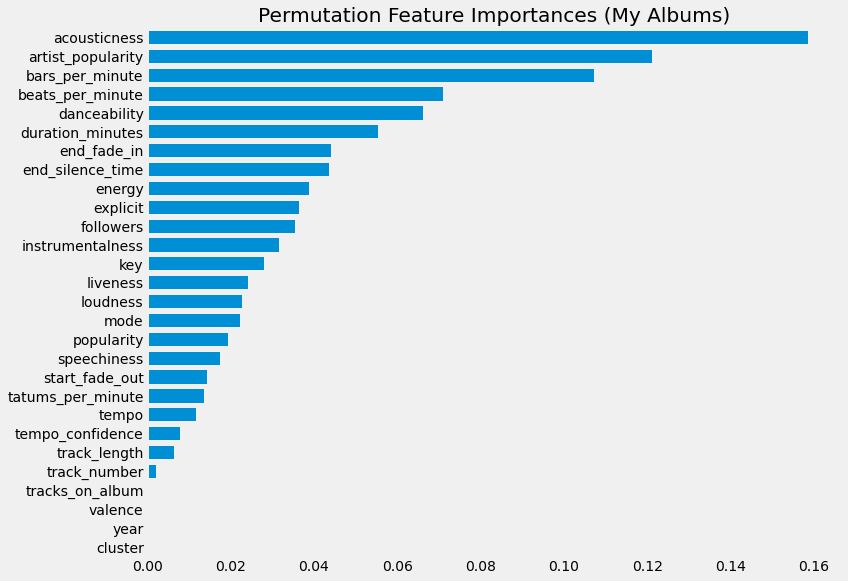

<Figure size 432x288 with 0 Axes>

In [12]:
result = permutation_importance(pca, X_train, y=None,n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(pca.explained_variance_ratio_)
tree_indices = np.arange(0, len(pca.explained_variance_ratio_)) + 0.5

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(tree_indices,
         pca.explained_variance_ratio_[tree_importance_sorted_idx], height=0.7)
ax.set_yticklabels(new_df.columns[tree_importance_sorted_idx])
ax.set_yticks(tree_indices)
ax.set_ylim((0, len(pca.explained_variance_ratio_)))

fig.tight_layout()
plt.title('Permutation Feature Importances (My Albums)')
plt.show()
#plt.savefig('images/feature_importance_mine.png');

In [24]:
X = new_df[['acousticness', 'artist_popularity', 'bars_per_minute']]
X['acousticness'].min(), X['acousticness'].max()

(0.0, 0.996)

In [25]:
print(f'acousticness: {X["acousticness"].min()}, {X["acousticness"].max()}')
print(f'artist_popularity: {X["artist_popularity"].min()}, {X["artist_popularity"].max()}')
print(f'bars_per_minute: {X["bars_per_minute"].min()}, {X["bars_per_minute"].max()}')

acousticness: 0.0, 0.996
artist_popularity: 40, 99
bars_per_minute: 0.0, 0.01849402312365275


In [19]:
X.iloc[:, 0].values

array([1.82e-02, 6.21e-04, 2.24e-03, ..., 1.68e-01, 5.53e-01, 9.13e-01])

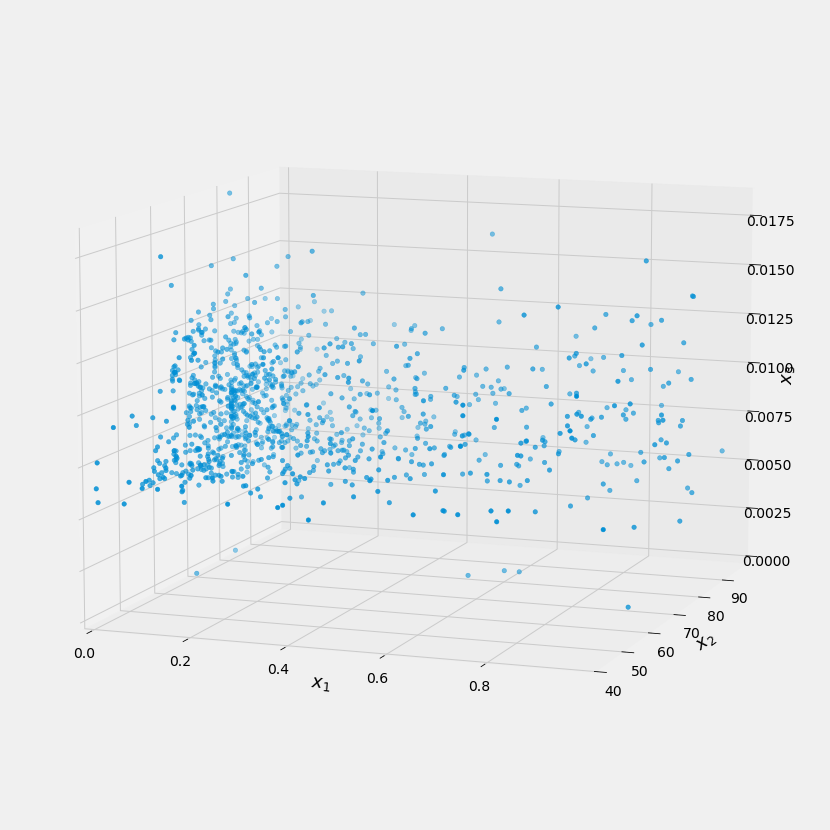

In [27]:
axes = [0, .996, 40, 99, 0.0, 0.01849402312365275]

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, X.iloc[:, 2].values, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

In [29]:
grouped = new_df.groupby('album').agg(np.mean)
grouped

,acousticness,artist_popularity,bars_per_minute,beats_per_minute,danceability,duration_minutes,end_fade_in,end_silence_time,energy,explicit,...,speechiness,start_fade_out,tatums_per_minute,tempo,tempo_confidence,track_length,track_number,tracks_on_album,valence,year
album,,,,,,,,,,,,,,,,,,,,,
10 Day,0.186210,85.0,0.007480,0.030049,0.593429,3.691455,0.076692,6.834086,0.676643,0.857143,...,0.255450,214.653322,0.060099,112.377786,0.301857,221.487408,7.500000,14.000000,0.557143,2012.0
1989,0.042831,99.0,0.008191,0.032868,0.643750,3.658527,0.684591,6.388210,0.740625,0.000000,...,0.078275,213.123458,0.065737,120.906500,0.450125,219.511668,4.750000,13.000000,0.521625,2014.0
1989 (Deluxe Edition),0.234888,99.0,0.008805,0.035299,0.663200,3.905910,0.240000,6.511182,0.623200,0.000000,...,0.048380,227.843482,0.070598,129.183400,0.383600,234.354664,10.600000,19.000000,0.374200,2014.0
Acid Rap,0.184071,85.0,0.007824,0.031551,0.645571,3.596792,0.532214,3.065963,0.502286,0.857143,...,0.324857,212.741559,0.063103,112.826857,0.347071,215.807522,7.500000,14.000000,0.491571,2013.0
An Awesome Wave,0.636357,75.0,0.008697,0.035095,0.554357,3.123482,0.588404,9.549118,0.448229,0.000000,...,0.067486,177.859800,0.070191,131.460857,0.463786,187.408918,7.500000,14.000000,0.274800,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXX (Deluxe Version),0.171313,68.0,0.008597,0.034497,0.612762,2.794290,0.000000,3.922218,0.746143,1.000000,...,0.297962,163.735224,0.068989,125.940762,0.365286,167.657442,11.000000,22.000000,0.492857,2012.0
You Can't Imagine How Much Fun We're Having,0.116664,63.0,0.007543,0.030365,0.649923,3.919914,0.549242,2.085164,0.883385,1.000000,...,0.255308,233.109708,0.060725,109.962154,0.430308,235.194872,7.000000,13.000000,0.628462,2005.0
You Gotta Go There To Come Back,0.100993,68.0,0.008092,0.031652,0.445846,4.547559,0.267512,7.183172,0.646615,0.000000,...,0.048285,265.670163,0.063304,115.685692,0.442308,272.853335,7.384615,14.000000,0.323077,2003.0


In [38]:
grp = grouped.reset_index()
grp

,album,acousticness,artist_popularity,bars_per_minute,beats_per_minute,danceability,duration_minutes,end_fade_in,end_silence_time,energy,...,speechiness,start_fade_out,tatums_per_minute,tempo,tempo_confidence,track_length,track_number,tracks_on_album,valence,year
0,10 Day,0.186210,85.0,0.007480,0.030049,0.593429,3.691455,0.076692,6.834086,0.676643,...,0.255450,214.653322,0.060099,112.377786,0.301857,221.487408,7.500000,14.000000,0.557143,2012.0
1,1989,0.042831,99.0,0.008191,0.032868,0.643750,3.658527,0.684591,6.388210,0.740625,...,0.078275,213.123458,0.065737,120.906500,0.450125,219.511668,4.750000,13.000000,0.521625,2014.0
2,1989 (Deluxe Edition),0.234888,99.0,0.008805,0.035299,0.663200,3.905910,0.240000,6.511182,0.623200,...,0.048380,227.843482,0.070598,129.183400,0.383600,234.354664,10.600000,19.000000,0.374200,2014.0
3,Acid Rap,0.184071,85.0,0.007824,0.031551,0.645571,3.596792,0.532214,3.065963,0.502286,...,0.324857,212.741559,0.063103,112.826857,0.347071,215.807522,7.500000,14.000000,0.491571,2013.0
4,An Awesome Wave,0.636357,75.0,0.008697,0.035095,0.554357,3.123482,0.588404,9.549118,0.448229,...,0.067486,177.859800,0.070191,131.460857,0.463786,187.408918,7.500000,14.000000,0.274800,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,XXX (Deluxe Version),0.171313,68.0,0.008597,0.034497,0.612762,2.794290,0.000000,3.922218,0.746143,...,0.297962,163.735224,0.068989,125.940762,0.365286,167.657442,11.000000,22.000000,0.492857,2012.0
79,You Can't Imagine How Much Fun We're Having,0.116664,63.0,0.007543,0.030365,0.649923,3.919914,0.549242,2.085164,0.883385,...,0.255308,233.109708,0.060725,109.962154,0.430308,235.194872,7.000000,13.000000,0.628462,2005.0
80,You Gotta Go There To Come Back,0.100993,68.0,0.008092,0.031652,0.445846,4.547559,0.267512,7.183172,0.646615,...,0.048285,265.670163,0.063304,115.685692,0.442308,272.853335,7.384615,14.000000,0.323077,2003.0
81,blink-182,0.090618,81.0,0.010103,0.039867,0.489786,3.072673,0.256689,6.889606,0.826714,...,0.066429,177.470776,0.079734,144.289357,0.577000,184.360382,7.500000,15.785714,0.470571,2003.0


In [43]:
fig = px.scatter_3d(grp, x='acousticness', y='bars_per_minute', z='danceability',
              color='energy', size='artist_popularity',
              symbol='explicit', opacity=0.7, hover_data=['album'])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [21]:
import plotly.express as px
uns = new_df.reset_index()

fig = px.scatter_3d(uns, x='acousticness', y='bars_per_minute', z='danceability',
              color='track_number', size='artist_popularity', size_max=18,
              symbol='explicit', opacity=0.7, hover_data=['album', 'name', 'artist'])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

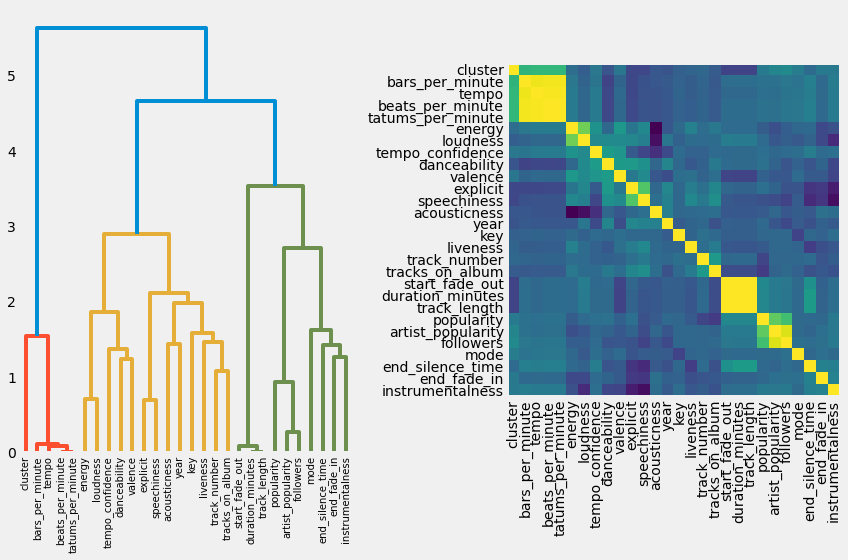

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=new_df.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

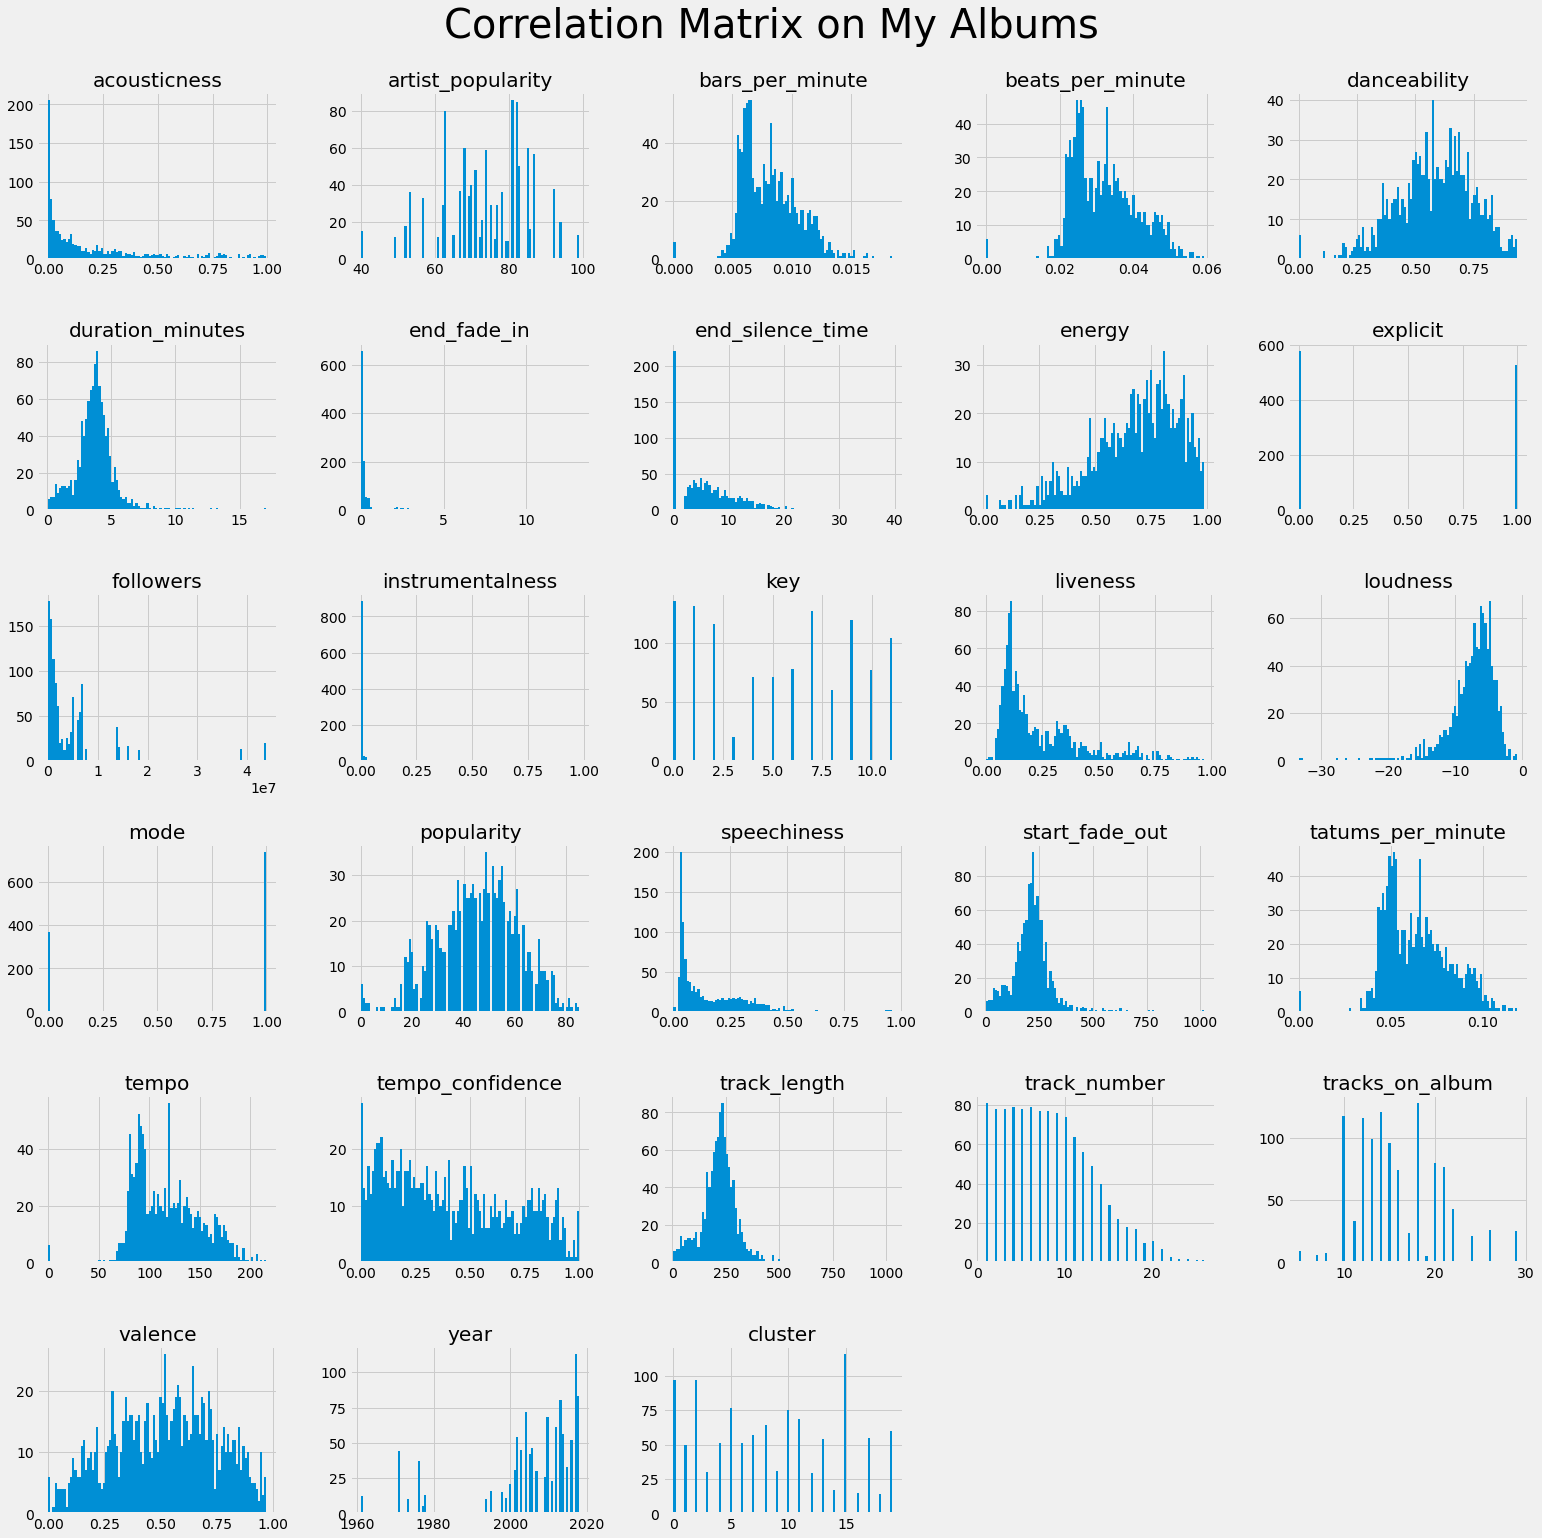

In [20]:
new_df.hist(figsize=(22,22), bins=100)
plt.suptitle('Correlation Matrix on My Albums', fontsize=40)
plt.tight_layout(pad=2)
plt.savefig('images/corr_hist_mine.png');

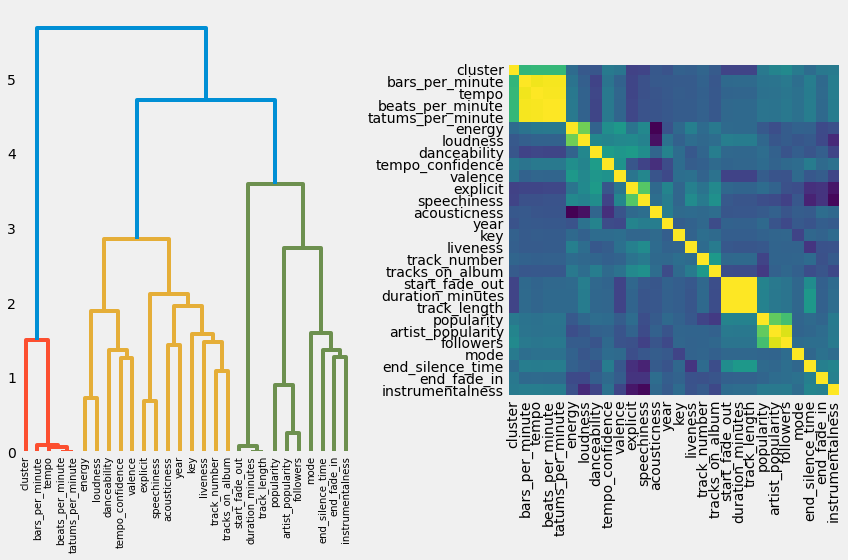

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(new_df).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=new_df.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [22]:
corrs = new_df.corr()
corrs

,acousticness,artist_popularity,bars_per_minute,beats_per_minute,danceability,duration_minutes,end_fade_in,end_silence_time,energy,explicit,...,start_fade_out,tatums_per_minute,tempo,tempo_confidence,track_length,track_number,tracks_on_album,valence,year,cluster
acousticness,1.000000,-0.002984,-0.019553,-0.064869,-0.137973,-0.114415,0.081548,0.028831,-0.585013,-0.064372,...,-0.118564,-0.064979,-0.054052,-0.269012,-0.114415,-0.007232,-0.014822,-0.186843,0.014929,-0.010732
artist_popularity,-0.002984,1.000000,0.078392,0.072221,-0.072495,0.091110,0.021422,-0.006525,-0.122645,-0.045171,...,0.093367,0.072190,0.066271,-0.022713,0.091110,-0.015250,-0.014261,-0.115101,-0.057075,0.213359
bars_per_minute,-0.019553,0.078392,1.000000,0.961503,-0.172454,0.070990,-0.024762,0.122752,0.064108,-0.141595,...,0.064602,0.961507,0.953794,0.013628,0.070990,-0.022994,-0.029684,0.006464,-0.097583,0.452230
beats_per_minute,-0.064869,0.072221,0.961503,1.000000,-0.143635,0.077205,-0.030506,0.121143,0.119221,-0.130945,...,0.071045,0.999999,0.990008,0.047939,0.077205,-0.029941,-0.037501,0.037872,-0.099083,0.471539
danceability,-0.137973,-0.072495,-0.172454,-0.143635,1.000000,-0.009765,-0.056676,-0.077065,0.060615,0.326969,...,-0.005051,-0.143618,-0.147670,0.339862,-0.009765,-0.007617,0.044935,0.321123,0.243349,-0.111747
duration_minutes,-0.114415,0.091110,0.070990,0.077205,-0.009765,1.000000,-0.005402,0.345168,0.061681,-0.040144,...,0.998210,0.077359,0.049029,-0.016680,1.000000,0.015190,-0.132559,-0.158389,-0.090913,-0.099596
end_fade_in,0.081548,0.021422,-0.024762,-0.030506,-0.056676,-0.005402,1.000000,0.063312,-0.139325,-0.089247,...,-0.009546,-0.030506,-0.028909,-0.059694,-0.005402,-0.074637,-0.060772,-0.170369,-0.003843,0.023389
end_silence_time,0.028831,-0.006525,0.122752,0.121143,-0.077065,0.345168,0.063312,1.000000,-0.042595,-0.261366,...,0.288420,0.121253,0.116821,0.126344,0.345168,0.026808,-0.112593,-0.090395,-0.145220,0.004083
energy,-0.585013,-0.122645,0.064108,0.119221,0.060615,0.061681,-0.139325,-0.042595,1.000000,0.108354,...,0.065641,0.119231,0.108138,0.259314,0.061680,0.029054,0.132174,0.324377,0.026720,-0.006161
explicit,-0.064372,-0.045171,-0.141595,-0.130945,0.326969,-0.040144,-0.089247,-0.261366,0.108354,1.000000,...,-0.024300,-0.130975,-0.138663,-0.101259,-0.040144,0.079543,0.133182,0.088592,0.290787,-0.194709


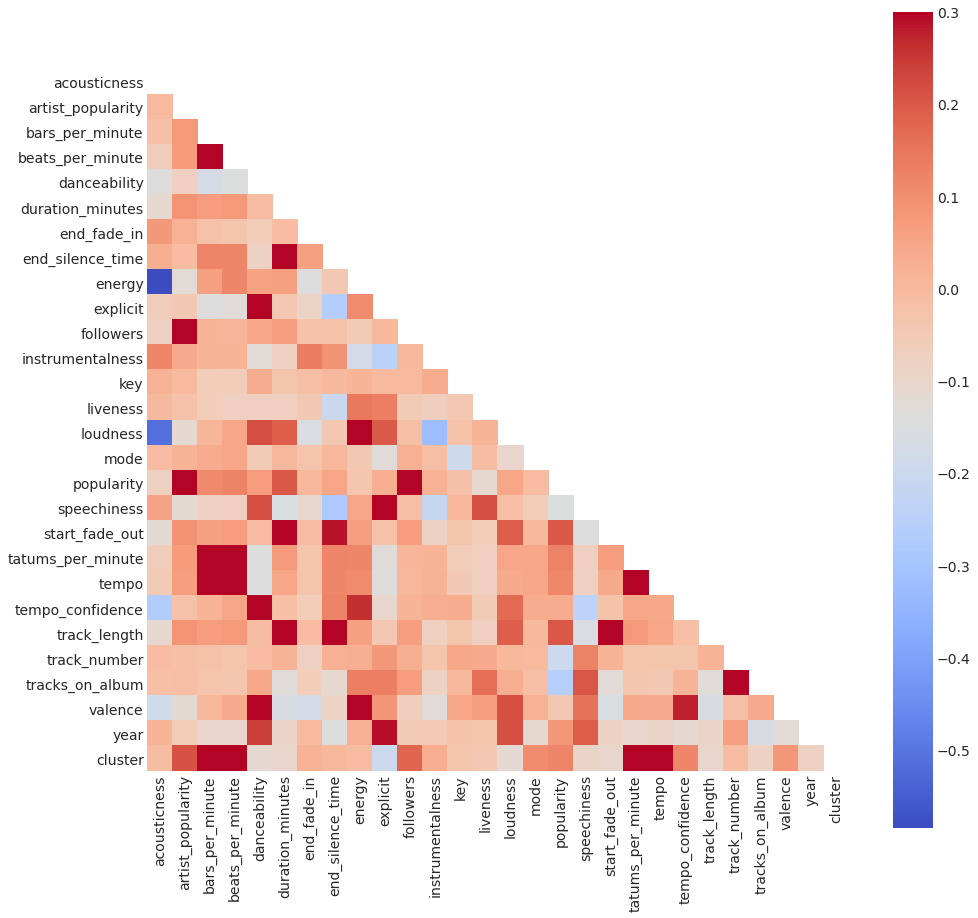

In [27]:
mask = np.zeros_like(corrs)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(14, 14))

    ax = sns.heatmap(corrs, mask=mask, vmax=.3, square=True, cmap='coolwarm')
    
plt.savefig('images/heatmap_mine.png')

In [ ]:
X = scaled

range_n_clusters = list(range(50,55))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
df_all = pd.read_pickle('../full_mega_main.pkl')
print(f'This shape is {df_all.shape}', '\n')

In [ ]:
df_all

In [ ]:
df_all['has_featured_artist'] = np.where(df_all['featured_artists'] == 'No Features', 0, 1)
df_all

In [ ]:
df_all.set_index(['album', 'name', 'artist', 'release_date', 'album_image_url', 'artist_image_url', 'id'], inplace=True)
df_all.head(3)

In [ ]:
num_df = df_all.select_dtypes(include='number')
num_df

In [ ]:
df_all.drop(['disco', 'indie r&b'], axis=1, inplace=True)

In [ ]:
df_mine = df_mine.loc[:,~df_mine.columns.str.match('Unnamed: 0')]

In [ ]:
print(f'num_df shape is {num_df.shape}', '\n')
print(f'Rolling shape is {df_mine.shape}', '\n')

In [ ]:
#df_mine.to_pickle('../final_num_mine.pkl')

In [ ]:
df_2010 = pd.read_pickle('../2010s_albums.pkl')
df_2010

In [ ]:
df_2010.reset_index(drop=True, inplace=True)

In [ ]:
df_2010['duration_ms'][43]

In [ ]:
cols = ['tatums', 'beats', 'bars']

for i in range(len(df_2010['tatums'])):
    
    for col in cols:
        
        df_2010[col][i] = len(df_2010[col][i]) / (df_2010['duration_ms'][i] / 60000)

In [ ]:
df_2010

In [ ]:
df_2010['tatums_per_minute'] = df_2010['tatums']
df_2010['beats_per_minute'] = df_2010['beats']
df_2010['bars_per_minute'] = df_2010['bars']
df_2010.head(3)

In [ ]:
df_2010['duration_minutes'] = df_2010['duration_ms'] / 60000
df_2010

In [ ]:
df_2010.set_index(['album', 'name', 'artist', 'release_date', 'album_image_url', 'artist_image_url', 'id'], inplace=True)

In [ ]:
appending = df_2010[['tatums_per_minute',
 'beats_per_minute',
 'bars_per_minute',
 'duration_minutes']]
appending

In [ ]:
df_2010s = pd.read_pickle('../num_2010s.pkl')

In [ ]:
df = df_2010s.join(appending)

In [ ]:
df[df['beats_per_minute'] == 128.34911]

In [ ]:
df.index.levels[1][0]

In [ ]:
df_2010s

In [ ]:
lst = []
for col in df_mine.columns:
    if col not in df_2010s.columns:
        lst.append(col)

In [ ]:
lst

In [ ]:
lst = []
for col in df_2010s.columns:
    if col not in df_mine.columns:
        lst.append(col)

In [ ]:
lst

In [ ]:
df_2010s['duration_minutes'] = df_2010s['duration_ms'] / 60000

In [ ]:
cols = ['tatums_per_second', 'beats_per_second', 'bars_per_second']

for i in range(len(df_mine['tatums_per_second'])):
    
    for col in cols:
        
        df_mine[col][i] = df_mine[col][i] / 60

In [ ]:
df_mine['tatums_per_minute'] = df_mine['tatums_per_second']
df_mine['beats_per_minute'] = df_mine['beats_per_second']
df_mine['bars_per_minute'] = df_mine['bars_per_second']
df_mine.head(3)

In [ ]:
df = df_mine.drop(['tatums_per_second'], axis=1)
df = df.drop(['beats_per_second'], axis=1)
df = df.drop(['bars_per_second'], axis=1)
df = df.drop(['duration_ms'], axis=1)
df.head(3)

In [ ]:
lst = []
for col in df_rolling.columns:
    if col not in df.columns:
        lst.append(col)

In [ ]:
lst

In [ ]:
df = df[df_rolling.columns]

In [ ]:
df.to_pickle('../final_num_mine.pkl')